# Local Policy Recommendations for Crime Reduction


Alexa Bagnard, Joseph Gaustad, Kevin Hartman, Francis Leung

## Introduction

In this report, we seek to examine and discuss determinants of crime and offer recommend actionable policy recommendations for local politicians running for election at the county level. For our analysis, we draw on sample data collected from a study by Cornwell and Trumball, researchers from the University of Georgia and West Virginia University. Our sample data includes data on crime rates, arrests, sentences,  demographics, local weekly wages, tax revenues and more drawn from local and federal government data sources. Although the age of the data may be a potential limitation of our study, we believe the insights we gather and policy recommendations remain appropriate for local campaigns today.


Our primary question that will drive our data exploration are to ask which variables affect crime rate the most.


## Variables

The crime_v2 dataset provided includes 25 variables of interest. 

We include them below for reference along by category of interest.

<center>Data Dictionary</center>

Category | Variable
---------- | -------------------------------
Crime Rate | crmrte
Geographic | county, west, central
Demographic | urban, density, pctmin80, pctymle
Economic - Wage | wcon, wtuc, wtrd, wfir, wser, wmfg, wfed, wsta, wloc
Economic - Revenue  | taxpc
Law Enforcment | polpc, prbarr, prbconv, mix
Judicial/Sentencing | prbpris, avgsen
Time Period | year

<center>Table 1: Data Dictionary</center>

The variables above operationalize the conditions we wish to explore and their affects on crime rate

Chiefly, these break down as follows.

* The Economic variables measures the county's economic activity and health (e.g. opportunity to pursue legal forms of income). These variables come in the form of available wages and tax revenue returned to the county.

* The Law enforcment variables measures the county's ability to utilize law enforcment policy to deter crime.  Similarly, the Judicial variables also signify impact of deterence to crime.

* The Demographic variables measure the cultural variability that represent the social differences between each county, such as urban vs rural and minority populations.

* The Geographic elements are categorical. They  represent they ways in which the population is segmented by geography.


## Exploratory Data Analysis

We begin our analysis by loading helper packages, retreiving the data set and performing basic checks and inspections.

In [26]:
library(dplyr)
library(ggplot2)
library(reshape2)

install.packages("gridExtra")
library(gridExtra)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
dfCrime = read.csv("crime_v2.csv")

In [5]:
str(dfCrime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [6]:
head(dfCrime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [7]:
tail(dfCrime)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [10]:
summary(dfCrime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

First, we note there are missing rows in the dataset that were imported. We'll remove those rows now.

In [12]:
nrow(dfCrime)
dfCrime <-na.omit(dfCrime) # omit the NA rows
nrow(dfCrime)

[1] 97

[1] 91

Next, we will inspect the data to see if there are duplicate records

In [13]:
dfCrime[duplicated(dfCrime),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


A duplicate row exists. We'll remove it.

In [14]:
dfCrime <- dfCrime[!duplicated(dfCrime),] # remove the duplicated row
nrow(dfCrime)

[1] 90

We also saw that pbconv was coded as a level. It is not a level but a ratio. We'll change that now.

In [15]:
dfCrime$prbconv<-as.numeric(levels(dfCrime$prbconv))[dfCrime$prbconv]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

We also notice by comparision of pctymle and pctmin80 one of the variables is off by a factor of 100. We will divide pctmin80 by 100 so the two variables are in the same unit terms.

In [16]:
dfCrime$pctmin80<-dfCrime$pctmin80/100

County was expressed as a number. However, it is a categorical variable and we will convert it to a factor instead.

In [17]:
dfCrime$county<-as.factor(dfCrime$county)

Next we inspect the indicator variables to see if they were coded correctly.

In [18]:
dfCrime %>% group_by(west, central) %>% tally()

west,central,n
0,0,35
0,1,33
1,0,21
1,1,1


One county was either mis-coded, or it truly belongs to both regions. However, this is very unlikely as the intended technique is to widen the data and introduce indicator variables for each category. It is not likley the data was captured for both categories.

We will need further analysis on this datapoint as it relates to the rest of the data.

For now, we will encode a new region variable and place the datapoint in its own category. 

In [19]:
#Map central and west to a region code, and create a new category for other
# Note that county 71 has both western and central codes
dfCrime$region <- case_when (
            (dfCrime$central ==0 & dfCrime$west ==0) ~ 0, #Eastern, Coastal, Other
            (dfCrime$central ==0 & dfCrime$west ==1) ~ 1, #Western
            (dfCrime$central ==1 & dfCrime$west ==0) ~ 2, #Central
            (dfCrime$central ==1 & dfCrime$west ==1) ~ 3, #Central-Western border county - this could be Charlotte or it could be a coding error.
        )

By way of the 1980 Census fact sheet, we discover the urban field is an encoding for SMSA (Standard Metropolitan Statistical Areas). https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
The value is one if the county is inside a metropolitan area. Otherwise, if the county is outisde a metropolitan area, the value is zero.
We create a metro factor variable to better describe this feature.

In [20]:
# create factor for SMSA (standard metropolitan statistical areas) with two levels - inside or outside
#    https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
dfCrime$metro =
            factor( dfCrime$urban , levels = 0:1 , labels =
                    c( 'Outside',
                       'Inside'
                      )
                   )

Next we will visualize each variable and its relationship to the variable crmrte through scatter plots

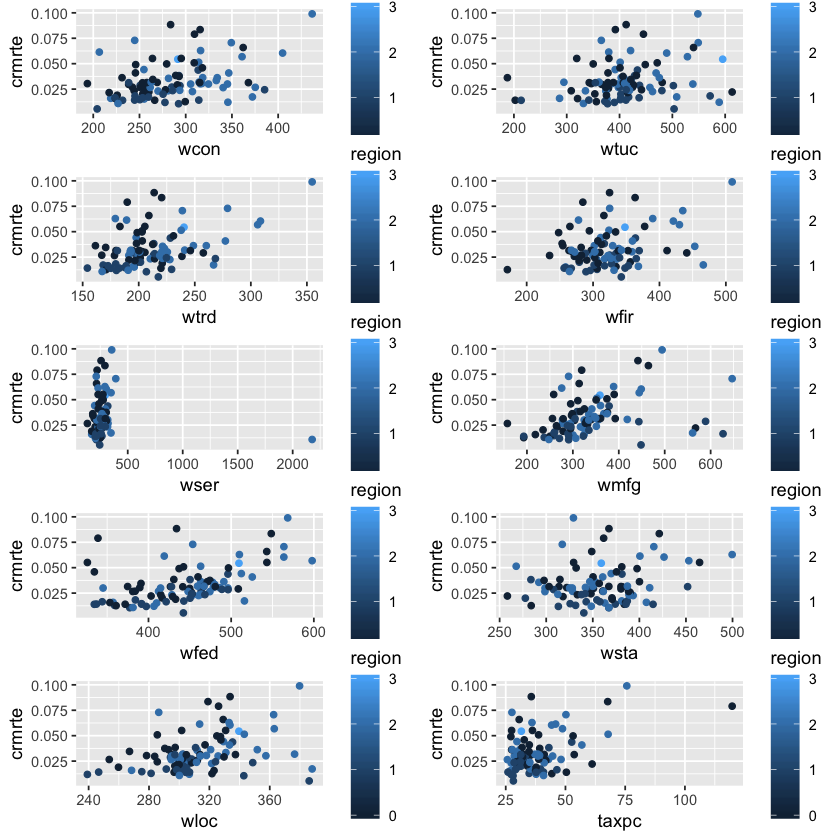

In [61]:
#Plot of the economic and tax related variables vs crmrte
q1<-ggplot(data = dfCrime, aes(x = wcon, y = crmrte, color = region)) + 
      geom_point()
q2<-ggplot(data = dfCrime, aes(x = wtuc, y = crmrte, color = region)) + 
      geom_point()
q3<-ggplot(data = dfCrime, aes(x = wtrd, y = crmrte, color = region)) + 
      geom_point()
q4<-ggplot(data = dfCrime, aes(x = wfir, y = crmrte, color = region)) + 
      geom_point()
q5<-ggplot(data = dfCrime, aes(x = wser, y = crmrte, color = region)) + 
      geom_point()
q6<-ggplot(data = dfCrime, aes(x = wmfg, y = crmrte, color = region)) + 
      geom_point()
q7<-ggplot(data = dfCrime, aes(x = wfed, y = crmrte, color = region)) + 
      geom_point()
q8<-ggplot(data = dfCrime, aes(x = wsta, y = crmrte, color = region)) + 
      geom_point()
q9<-ggplot(data = dfCrime, aes(x = wloc, y = crmrte, color = region)) + 
      geom_point()
q10<-ggplot(data = dfCrime, aes(x = taxpc, y = crmrte, color = region)) + 
      geom_point()
grid.arrange(q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, ncol=2)

We observe a few data points of interest in the comparison above, notably, wser and taxpc appear to have extreme data points

Other variables show outliers as well, but not as extreme. We will see if any of these points have leverage or influence.

In [84]:
dfCrime %>%
filter(wser > 2000)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,region,metro
185,87,0.0108703,0.195266,2.12121,0.442857,5.38,0.0012221,0.3887588,40.82454,⋯,264.4231,2177.068,247.72,381.33,367.25,300.13,0.04968944,0.07008217,2,Outside


This average service wage for 1987 is much too high compared to what we know about the 1980s and every other wage recorded in comparison. We will adjust this wage by replacing it with the average from the sample population.

In [87]:
dfCrime$wser[which(dfCrime$county==185)]<- mean(dfCrime$wser)
dfCrime$wser[which(dfCrime$county==185)]

[1] 275.3379

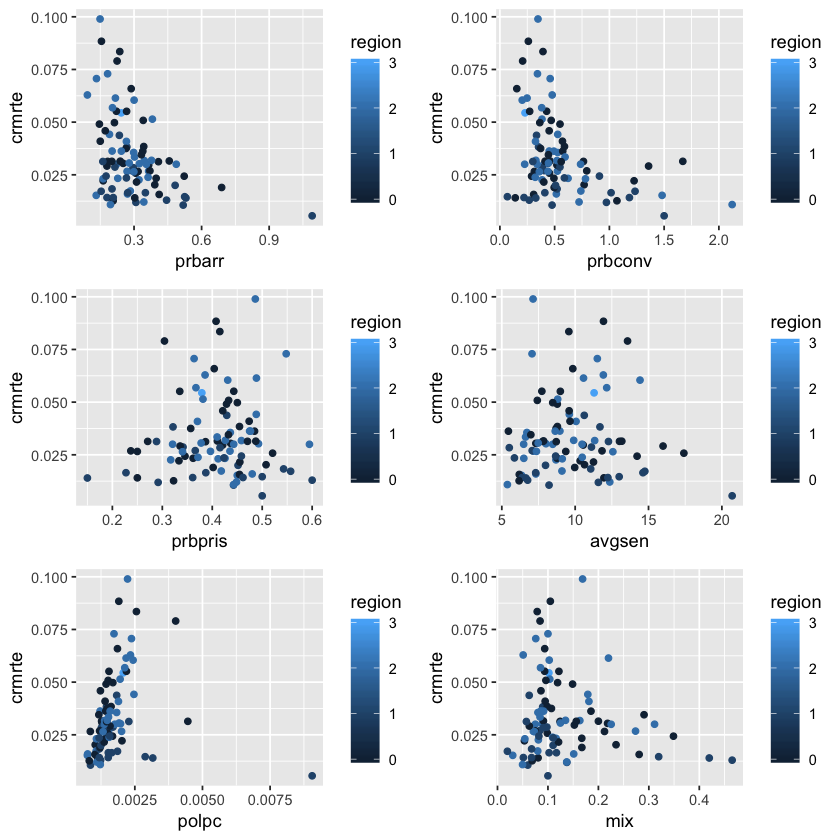

In [42]:
#Plot of the criminal justice and law enforcment related variables vs crmrte
q1<-ggplot(data = dfCrime, aes(x = prbarr, y = crmrte, color = region)) + 
      geom_point()
q2<-ggplot(data = dfCrime, aes(x = prbconv, y = crmrte, color = region)) + 
      geom_point()
q3<-ggplot(data = dfCrime, aes(x = prbpris, y = crmrte, color = region)) + 
      geom_point()
q4<-ggplot(data = dfCrime, aes(x = avgsen, y = crmrte, color = region)) + 
      geom_point()
q5<-ggplot(data = dfCrime, aes(x = polpc, y = crmrte, color = region)) + 
      geom_point()
q6<-ggplot(data = dfCrime, aes(x = mix, y = crmrte, color = region)) + 
      geom_point()

grid.arrange(q1, q2, q3, q4, q5, q6, ncol=2)

The criminal justice and law enforcement variables also show evidence of possible outliers, notably, pbarr and polpc appear to have extreme data points

We also see that prbarr and prbconv have values greater than 1. However, these are not true probabity numbers and are instead ratios used as a stand in for the true probability numbers.

There is a possibility of higher arrests per incident for an area. Meaning, the area has low incidents in general but when there were incidents there were also multiple arrests. The same case can be made for the convictions per arrest variable which we see is for a different region. In that county there may have been multiple charges brought per one arrest.


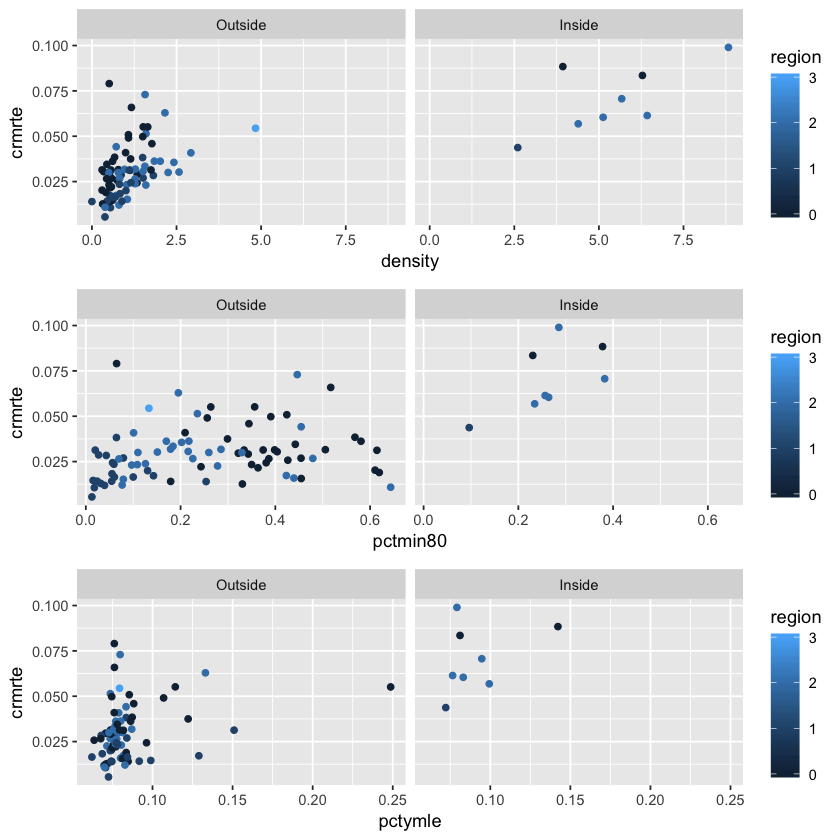

In [88]:
#plot of demographic information for counties Outside and Inside the metro areas
# population density, percent minority, percent young male

q1<-ggplot(data = dfCrime, aes(x = density, y = crmrte, color = region)) + 
      geom_point() + facet_wrap(~ metro)
q2<-ggplot(data = dfCrime, aes(x = pctmin80, y = crmrte, color = region)) + 
      geom_point() + facet_wrap(~ metro)
q3<-ggplot(data = dfCrime, aes(x = pctymle, y = crmrte, color = region)) + 
      geom_point()+ facet_wrap(~ metro)

grid.arrange(q1, q2, q3, ncol=1)

Notably more outliers are observed in demographic information. Here, pctymle in one county outside of a metro area is nearly 25%. That seems quite high in normal statistical measures of the population. It is likely an outlier. 

Finally, we can see our bright blue region 3 county and notice its population density. Its behavior is more similar to an inside metro area. Than outside. In addition to be coded for both western and central regions, it appears to be miscoded here as well.

There is likely a data transcription error where a column was not enterered correctly and it continued on to the next column where the region variables are encoded. We will put this information in our back pocket.

Next, we will create histograms for each variable

No id variables; using all as measure variables


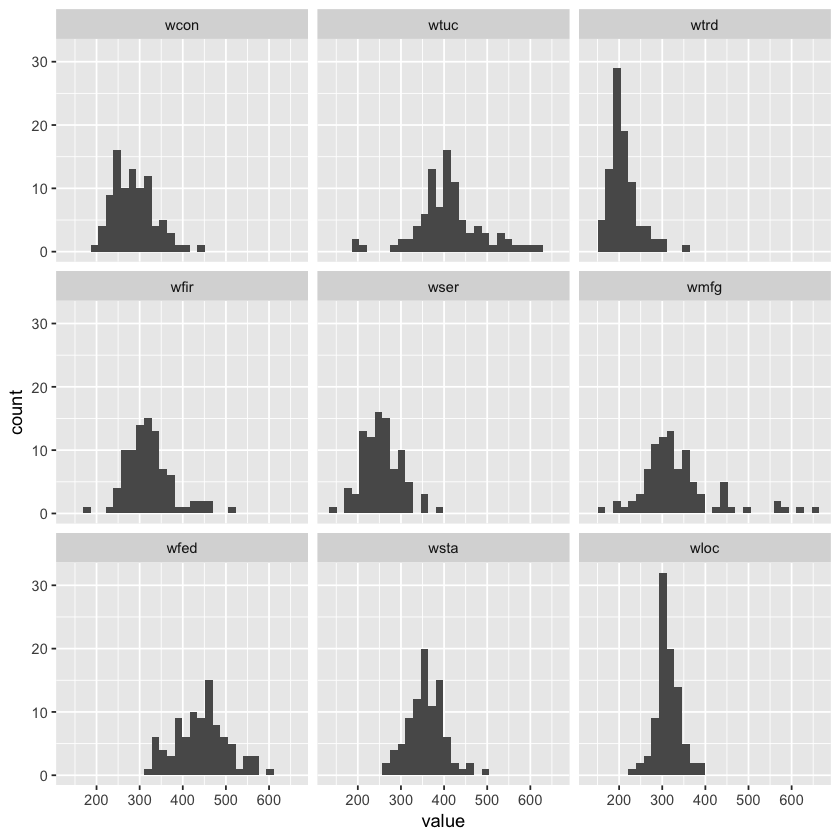

In [121]:
dfEconVars <- as.data.frame(cbind(dfCrime$wcon, dfCrime$wtuc, dfCrime$wtrd, dfCrime$wfir, dfCrime$wser, dfCrime$wmfg, dfCrime$wfed, dfCrime$wsta, dfCrime$wloc))
names(dfEconVars) <- c('wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 
                              'wmfg', 'wfed', 'wsta', 'wloc')

ggplot(melt(dfEconVars),aes(x=value)) + geom_histogram(bins=30) + facet_wrap(~variable)

Each histogram for the wage information looks  evenly distributed. We have no further remark at this time. We move to the justice an law enforcement variables. With these variables being mostly < 1 we'll also take the log for comparison.

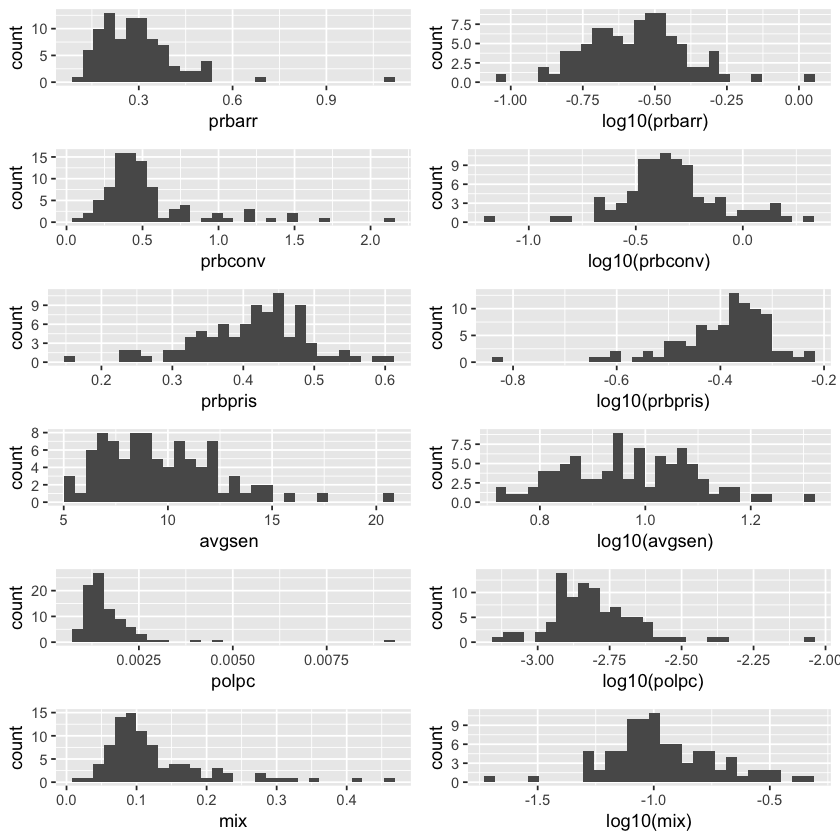

In [132]:
q1<-ggplot(data = dfCrime, aes(x = prbarr)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log10(prbarr))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = prbconv)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log10(prbconv))) + 
      geom_histogram(bins=30)

q3<-ggplot(data = dfCrime, aes(x = prbpris)) + 
      geom_histogram(bins=30)
q31<-ggplot(data = dfCrime, aes(x = log10(prbpris))) + 
      geom_histogram(bins=30)

q4<-ggplot(data = dfCrime, aes(x = avgsen)) + 
      geom_histogram(bins=30)
q41<-ggplot(data = dfCrime, aes(x = log10(avgsen))) + 
      geom_histogram(bins=30)

q5<-ggplot(data = dfCrime, aes(x = polpc)) + 
      geom_histogram(bins=30)
q51<-ggplot(data = dfCrime, aes(x = log10(polpc))) + 
      geom_histogram(bins=30)

q6<-ggplot(data = dfCrime, aes(x = mix)) + 
      geom_histogram(bins=30)
q61<-ggplot(data = dfCrime, aes(x = log10(mix))) + 
      geom_histogram(bins=30)


grid.arrange(q1, q11, q2, q21, q3, q31, q4, q41, q5, q51, q6, q61, ncol=2)

The log transformation for these variables makes them more evenly distributed. We will convert these of variables to their log10 equivalents for our models.

In [133]:
dfCrime$logprbarr = log10(dfCrime$prbarr)
dfCrime$logprbconv = log10(dfCrime$prbconv)
dfCrime$logprbpris <- log10(dfCrime$prbpris)
dfCrime$logavgsen <- log10(dfCrime$avgsen)
dfCrime$logpolpc <-log10(dfCrime$polpc)
dfCrime$logmix <- log10(dfCrime$mix)

Next we take a look at the demographic histograms and their log alternatives

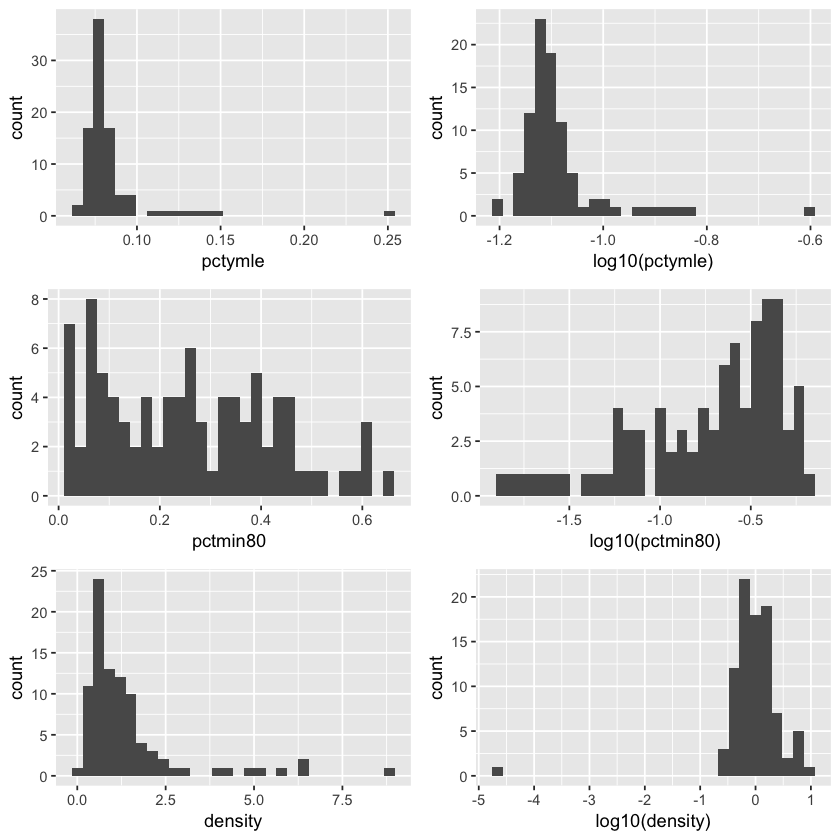

In [134]:
q1<-ggplot(data = dfCrime, aes(x = pctymle)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log10(pctymle))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = pctmin80)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log10(pctmin80))) + 
      geom_histogram(bins=30)

q3<-ggplot(data = dfCrime, aes(x = density)) + 
      geom_histogram(bins=30)
q31<-ggplot(data = dfCrime, aes(x = log10(density))) + 
      geom_histogram(bins=30)


grid.arrange(q1, q11, q2, q21, q3, q31, ncol=2)

The shape after transformation do not appear to make the data more distributed. We'll leave these variables as they are for now.

Finally, we'll take a look at taxpc and the crmrte variable itself.

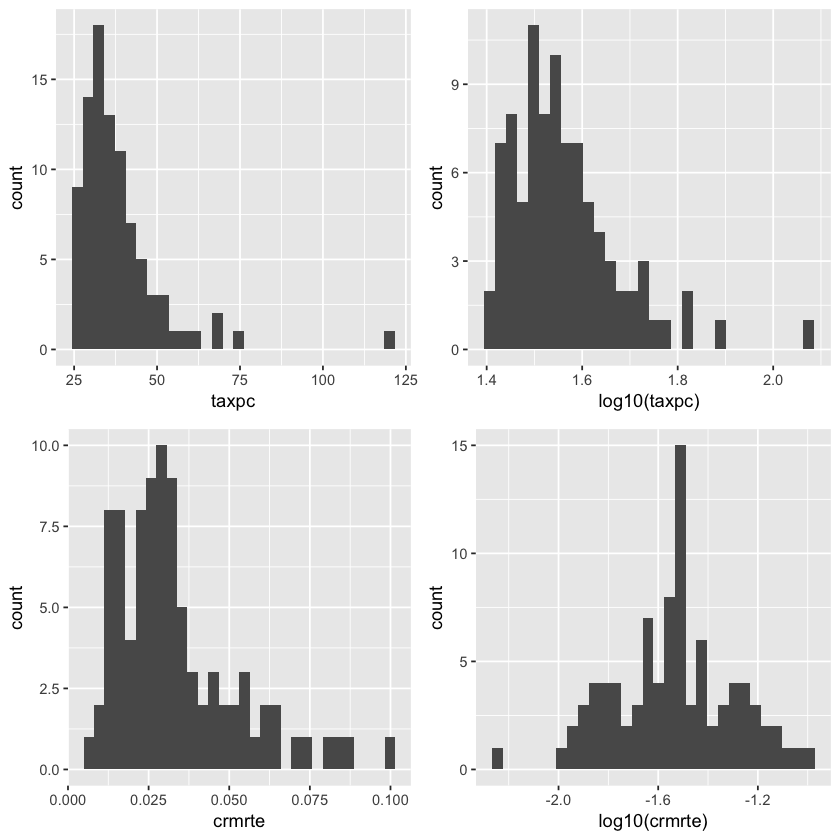

In [136]:
q1<-ggplot(data = dfCrime, aes(x = taxpc)) + 
      geom_histogram(bins=30)
q11<-ggplot(data = dfCrime, aes(x = log10(taxpc))) + 
      geom_histogram(bins=30) 
            
q2<-ggplot(data = dfCrime, aes(x = crmrte)) + 
      geom_histogram(bins=30)
q21<-ggplot(data = dfCrime, aes(x = log10(crmrte))) + 
      geom_histogram(bins=30)

grid.arrange(q1, q11, q2, q21, ncol=2)

The crmrte variable is more evenly distributed after transformation. We'll add that to our dataframe.

In [137]:
dfCrime$logcrmrte = log10(dfCrime$crmrte)

As a final point of discussion we will identify additional variables  we wish to operationalize for use in our models. The include a variable that expresses the economic condition of the county and a variable that expresses criminal justice effectiveness.

The first variable on the economic condition will include the sum of all average weekly wages  from the 1980 census information. Since we do not know how many were employed at that wage we use this summary the best available proxy.

In [145]:
dfCrime$allWages<-dfCrime$wcon + dfCrime$wtuc + dfCrime$wtrd + dfCrime$wfir +
    dfCrime$wser + dfCrime$wmfg + dfCrime$wfed + dfCrime$wsta + dfCrime$wloc

As a second variable, we are interested in understanding the effectiveness of the criminal justice system as a crime deterrent. Our proxy will be the number of convictions per incident.

This is operationalized by taking the probability of arrests, pbrarr (which is defined as arrests per incident) and multiplying by the probability of convictions, pbrconv (which is defined as convictions per arrest). The new variable is defined below.

In [146]:
dfCrime$crimJustEff<-dfCrime$prbarr * dfCrime$prbconv

We will also create a logarithmic transformation of this variable based on our histogram analysis from before.

In [147]:
dfCrime$logcrimJustEff<-log10(dfCrime$crimJustEff)

In [ ]:
#In case we want these later...
#dfCrime$logpctymle <- log10(dfCrime$pctymle)
#dfCrime$logdensity <- log10(dfCrime$density)
#dfCrime$logtaxpc <- log10(dfCrime$taxpc)
#dfCrime$logpctmin80 <- log10(dfCrime$pctmin80)

## Summary and Results

Our outcome variable is the *crime rate* (“crmrte”), which is defined as the crimes committed per person in a specific county during 1987. The crime rate of the 90 counties in our sample dataset range between 0.0055 - 0.0990, with a mean of 0.0335.

From the boxplot below, most of the counties have a crime rate between 0.0055 and 0.0700, with 5 outliers having a crime rate > 0.0700.

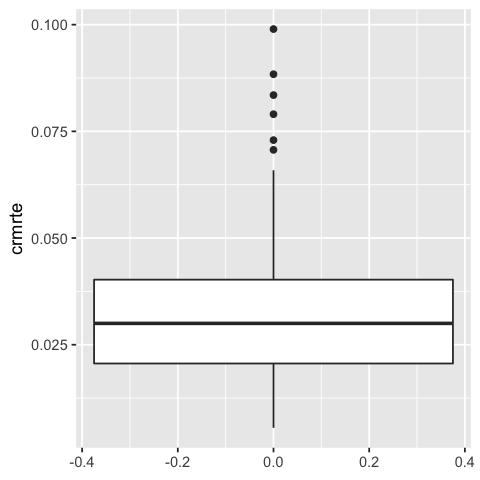

In [144]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(data = dfCrime, aes(y = crmrte)) + 
      geom_boxplot()

We propose 3 multiple linear regression models

* First Model: Has only the explanatory variables of key interest and no other covariates.

* Second Model: Includes the explanatory variables and covariates that increase the accuracy of our results without substantial bias.

* Third Model: An expansion of the second model with most covariates, designed to demonstrate the robustness of our results to model specification.

As we proceed with each model, we verify the CLM assumptions of OLS are addressed below:
* **MLR1** Linear in parameters: The model has had its data transformed as described above to allow a linear fit of the model.
* **MLR2** Random Sampling: The data is collected from a data set with rolled up data for each county.  It is not randomly sampled by area or population.
* **MLR3** No perfect multicollinearity: None of the variables chosen for the model are constant or perfectly collinear as the economy and criminal justice effectiveness are independent.
* **MLR4'** The expectation of u and and covariance of each regressor with u are ~0.  This shows that our model’s regressors are exogenous with the error.

By satisfying these assumptions, we can expect  our coefficients will be approaching the true parameter values in probability.

## Model 1 
Our base hypothesis is that crime can be fundamentally explained by two factors: the effectiveness of the criminal justice system and the economic conditions.

Criminal Justice Effectiveness is self defined : To be able to track crimes, they must be reported to police, who can then make arrests and the legal system provides judgement (convictions/sentencing)
Relationship as a deterrent: Probability of getting caught, convicted, sentenced could potentially deter crime.

We operationalize criminal justice effectiveness as follows: probability of Convictions * 
Crimes committed. We define as: prbconv * prbarr = conv/arrest * arrest/crime = convictions/crime. Ideally we could use

Policy recommendations here would be to increase efficiency of CJ system.



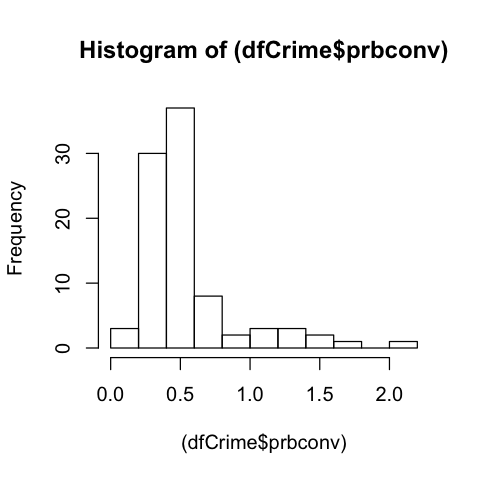

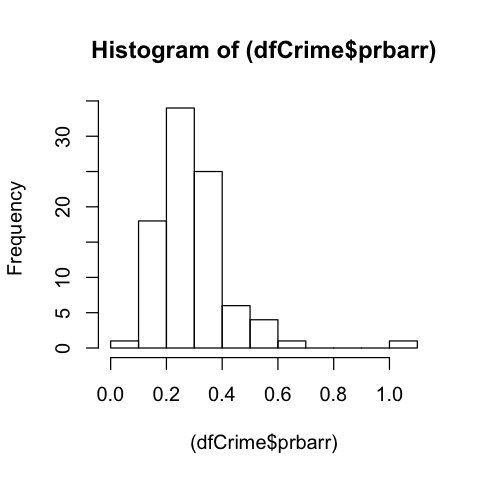

In [148]:
hist((dfCrime$prbconv))
hist((dfCrime$prbarr))

The distribution of both probability of conviction and probability of arrest are peculiar and non-normal.  It could be argued that both of these variables should be bound between 0 and 1.  However, "probability" of conviction is proxied by a ratio of convictions to arrests.  It is in fact common that defendents are charged with multiple crimes and convicted, but were only arrested once. 

For "probability" of arrest, it could be possible there are multiple arrests for a single offense. However, the single data point that is greater than one, is >3 standard deviations away from the distribution.  This outlier will have high leverage on our model and will be preemptively removed as the data supplied is likely in error and is not representative of the bulk of North Carolina counties. 

For parsimony, we can simply the probability of arrest and probability of conviction by multiplying to effectively get the ratio of convictions to offenses.  The normality of this factor can be improved by taking a log transform. QQ plots help to visualize how normality improves for the inner quartiles.  

[1] 5.779438

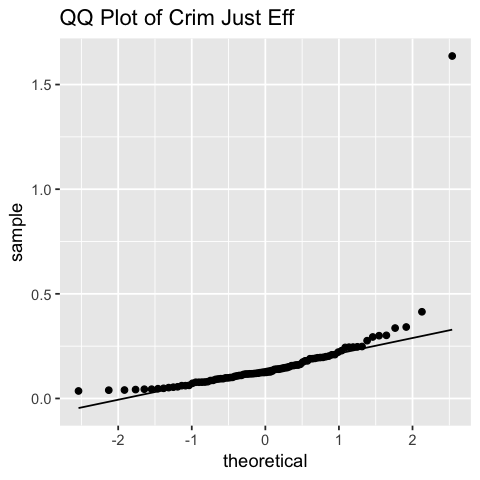

In [149]:
dfCrime$crimjusteff <- dfCrime$prbconv * dfCrime$prbarr
(dfCrime[51,]$prbarr - mean(dfCrime$prbarr))/sd(dfCrime$prbarr) # how many standard deviations away the outlier lies
#hist(log(dfCrime$crimjusteff))
ggplot(data=dfCrime, aes(sample= crimjusteff)) + stat_qq() + stat_qq_line() + ggtitle("QQ Plot of Crim Just Eff")

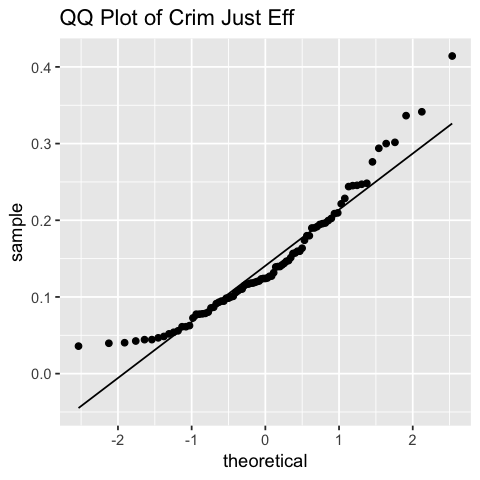

In [150]:
dfCrime <- dfCrime[dfCrime$crimjusteff < 1,] # removing high flying outlier
ggplot(data=dfCrime, aes(sample= crimjusteff)) + stat_qq() + stat_qq_line() + ggtitle("QQ Plot of Crim Just Eff")

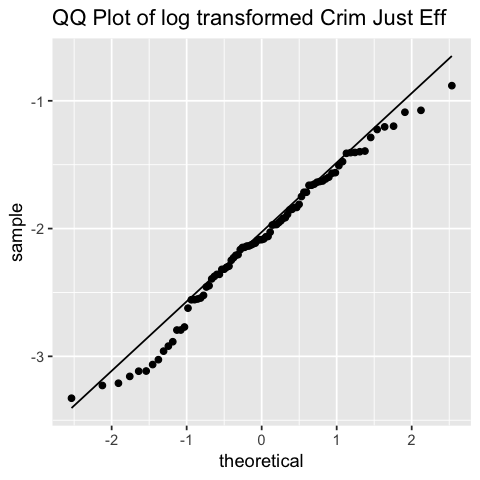

In [151]:
ggplot(data=dfCrime, aes(sample= log(crimjusteff))) + stat_qq() + stat_qq_line() + 
ggtitle("QQ Plot of log transformed Crim Just Eff")
## Can show histogram/qqplot side by side in RMD. 

We theorize that the second major cause of crime are bad economic conditions.  When there are worse economic conditions, crime can be more attractive due to:

* Lack of means: People forced into crimes because they need to make ends meet
* Lack of occupation: People commit crimes because they are not busy at work
* Lack of opportunity: High discount rate for future due to no long-term opportunity, incentive to take the risk and commit crimes hoping for big payoff. 
* Note: I think socio demographics here are not causes but outcomes of some combination of the above. We discuss demographics in model 2

We operationalize economic conditions by looking at wages. For this model, we define this as [sum of all average wages in each county]. We think this is best proxy from our data because it answers all of the above (higher wages leads to better means and better opportunities). From our EDA we also confirm that in general these sums are not skewed by having 1 really high paying sector in each county as we see a strong relationship between avg quartile across all job types and total sum (insert francis’ chart).  



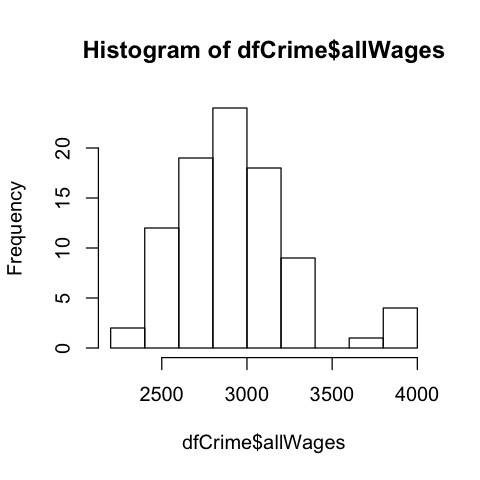

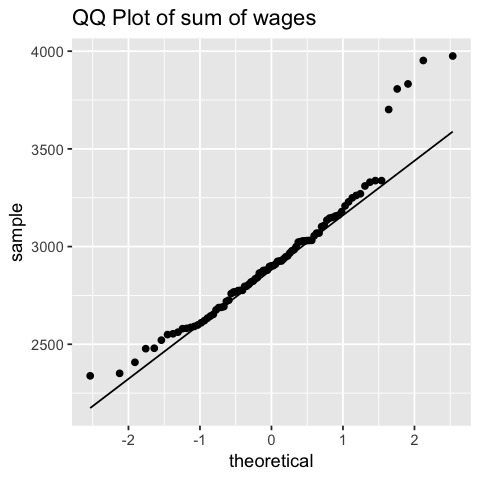

In [152]:
dfCrime$allWages <- dfCrime$wcon + dfCrime$wtuc + dfCrime$wtrd + dfCrime$wfir + dfCrime$wser + 
dfCrime$wmfg + dfCrime$wfed + dfCrime$wsta + dfCrime$wloc
hist(dfCrime$allWages)
ggplot(data=dfCrime, aes(sample= allWages)) + stat_qq() + stat_qq_line() + ggtitle("QQ Plot of sum of wages")

In [153]:
mod1 <- lm(log(dfCrime$crmrte) ~ dfCrime$allWages + log(dfCrime$crimjusteff))
(mod1)
summary(mod1)$adj.r.square
## will be details on effect size and standard error as we cover this in class.


Call:
lm(formula = log(dfCrime$crmrte) ~ dfCrime$allWages + log(dfCrime$crimjusteff))

Coefficients:
             (Intercept)          dfCrime$allWages  log(dfCrime$crimjusteff)  
               -6.301185                  0.000638                 -0.435190  


[1] 0.4558464

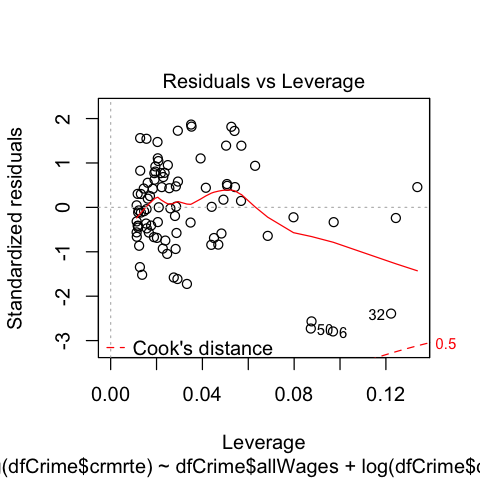

In [154]:
plot(mod1, which=5)

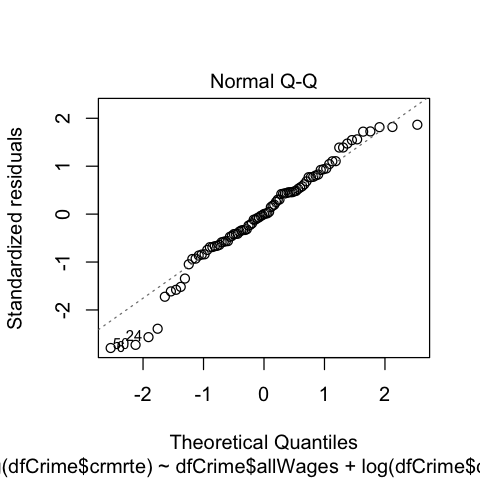

In [155]:
plot(mod1, which=2)

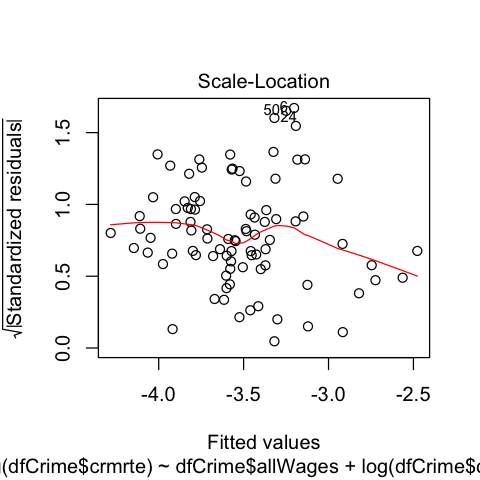

In [156]:
plot(mod1, which=3)

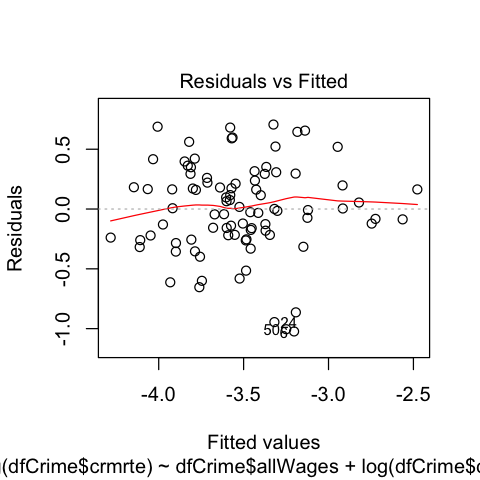

In [157]:
plot(mod1, which=1)

The model shows a moderate good fit, with an adjusted R square of 0.46.  This can be interpreted as, the model explains 46% of the variation in crime.  Next the model is plotted in a Residuals vs Leverage plot.  This plot shows that all the points have a cook's distance of less than 0.5.  There are no points that have enough leverage and residual than when deleted greatly alter the model coefficients. 

The root of standardized residuals all fall within about 1.6.  This is very good, as we can expect 95% of the points to fall within 3 standardized residuals of each other. ($\sqrt(3) \approx 1.73$)

Finally, the residuals vs fitted plot shows a well centered and mostly nromal distribution about 0.  There are no major trends or variation changes across the fitted values.  This suggests that major uncorrelated variables have not been left out of the model.  We will discuss the possible ommited variable biases further, in the next sections.

The CLM assumptions of OLS are addressed below:
* **MLR1** Linear in paramters: The model has had its data transformed as described above to allow a linear fit of the model.
* **MLR2** Random Sampling: The data is collected from a data set with rolled up data for each county.  It is not randomly sampled by area or population. 
* **MLR3** No perfect multicollinearity: None of the variables chosen for the model are constant or perfectly collinear as the economy and criminal justice effectiveness are independent.
* **MLR4'** The expectation of u and and covariance of each regressor with u are ~0.  This shows that our model's regressors are exogenous with the error.  

By satisfying these assumptions, we can expect that our coefficients are approaching the true parameter values in probability. 

##MLR 5,6 to be discussed in week 13...?

In [158]:
cov(resid(mod1), dfCrime$allWages)
cov(resid(mod1), log(dfCrime$crimjusteff))
mean(resid(mod1))

[1] 4.392162e-15

[1] 4.505291e-18

[1] 1.209586e-17